# JUPYTER NOTEBOOK FOR HOMEWORK 1
PART 1 - Sharpen a blurred colored image using a Gaussian filter

In [20]:
import numpy as np
from skimage import color, draw
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#Create a Gaussian filter of n x n size and width sigma
def gaussian_filter(n, sigma=1):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    return g
 

#draw a circular patch on a color image Img; the patch is centered at r,c, with radius rad
#and color col (0-black; 1-red; 2-cyan; 3-green)
#Note that this function directly modifies Img. 
def draw_patch(Img, r, c, rad=7,col=1):   
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
        
    rr, cc = skimage.draw.circle(r, c, rad)
    Img[rr,cc, 0:3]= p       

        

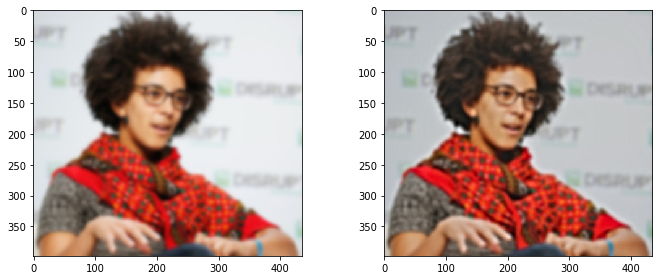

In [21]:
#1. Load your image of choice.
img = load_img('images/timnit_blur.jpg')

#2. Create a Gaussian filter here
'****Put your code here.'
g = gaussian_filter(50, 5)

#3. Next, convert your image to L.a.b. color scale
lab = color.rgb2lab(img)

#4. Extract the first channel to get the intensity-only image. Say this results in L
'****Put your code here.'
#img2 = lab.copy()
#img2 = img2[:, :, 0]
#print(img2)
L = lab[:, :, 0]

#5. Convolve this new image L with the filter g to get a smoothed image Simg
'****Put your code here.'
Simg = convolve(L, g)
               
#6. Create a new image by multiplying L by a small constant r and Simg by another small constant s
r = 0.56
s = 0.3
newL = r*L - s*Simg
minL = newL.min()
maxL = newL.max()

#7. Normalize your new image so that its values are between 0 and 100
'****Put your code here.'
newL = ((newL - minL)*100)/(maxL - minL)


#8. Recombine this new L image with the previous a and b channels of the lab image in step #3.
'****Put your code here.'
lab2 = np.dstack((newL, lab[:,:, 1], lab[:, :, 2]))

#9. Reconvert the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = color.lab2rgb(lab2)
#10. Examine your newly sharpened image and save it to file. Also display the original and sharpened image side-by-side
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(img2)
fig.tight_layout()
plt.show()


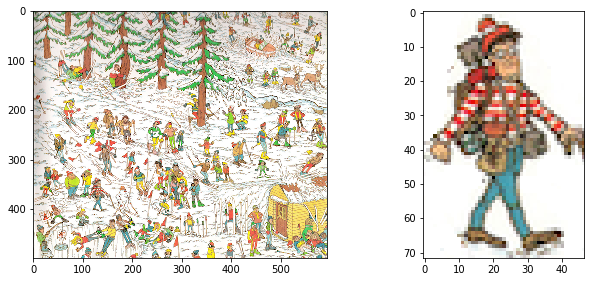

In [22]:
#1. Load the image and Waldo template
img1 = load_img('images/waldo_onIce.png')
temp1 = load_img('images/waldo_template.png')

#Convert the two images to grayscale
img = color.rgb2gray(img1)
temp = color.rgb2gray(temp1)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

Matched Co-ordinates: 311.0 507.5


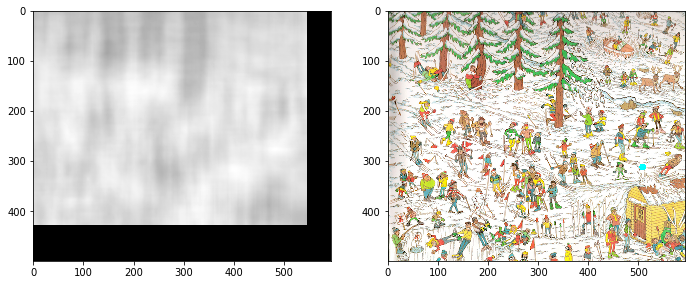

In [24]:
#2. Write and call a cross-correlation function to find the best match for Waldo
def crosscorr(Img, f):
    '****Put your code here.'
    Img_Length, Img_Breadth = Img.shape
    #print(Img_Length, Img_Breadth)
    filter_Length, filter_Breadth = f.shape
    out = np.zeros((Img_Length, Img_Breadth), dtype = int)
    outImg = out.tolist()
    max_Value = 0
    pixel_Value = 0
    R_max , C_max = 0, 0
    #print(outImg.shape)
    for i in range(0, Img_Length - filter_Length):
        for j in range(0, Img_Breadth - filter_Breadth):
            pixel_Value = np.sum(f*Img[i:filter_Length + i, j: filter_Breadth + j])
            #print(pixels)
            if pixel_Value > max_Value:
                max_Value = pixel_Value
                R_max , C_max = i, j
            #print(i, j)
            outImg[i][j] = pixel_Value
            #print(outImg[i][j])
        #print(pixels)
    r = R_max + (filter_Length/2)
    c = C_max + (filter_Breadth/2)
    return outImg, r, c
    
out_Img, r, c = crosscorr(img,temp)
print("Matched Co-ordinates: " + str(r) + " " + str(c))

#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 
# 
'****Put your code here.'
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(out_Img, cmap = "gray")
draw_patch(img1, r, c, rad = 7, col = 2)
ax[1].imshow(img1)
fig.tight_layout()
plt.show()

371.0 132.5


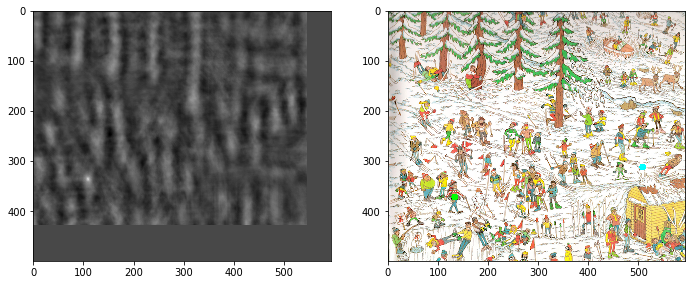

In [25]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    '****Put your code here.'
    new_Img = (Img - np.mean(Img))/np.sqrt(np.sum(np.square(Img - np.mean(Img))))
    new_f = (f - np.mean(f))/np.sqrt(np.sum(np.square(f - np.mean(f))))
    return crosscorr(new_Img, new_f)
    
    
out_Img_norm, r_norm, c_norm = normcrosscorr(img,temp)
print(r_norm, c_norm)
#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 
# 
'****Put your code here.'
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(out_Img_norm, cmap = "gray")
draw_patch(img1, r_norm, c_norm, rad = 7, col = 3)
ax[1].imshow(img1)
fig.tight_layout()
plt.show()

371.0 132.5


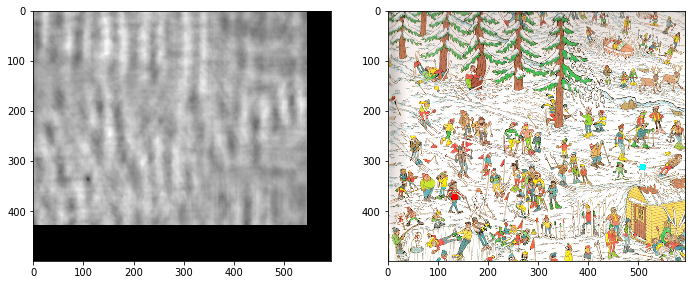

In [26]:
#6. Write and call an SSD function to find the best match for Waldo
def SSD(Img, f):
    '****Put your code here.'
    Img_Length, Img_Breadth = Img.shape
    filter_Length, filter_Breadth = f.shape
    out = np.zeros((Img_Length, Img_Breadth), dtype = int)
    outImg = out.tolist()
    min_Value = 255
    pixel_Value = 0
    R_min , C_min = 0, 0
    for i in range(0, Img_Length - filter_Length):
        for j in range(0, Img_Breadth - filter_Breadth):
            pixel_Value = np.sum(np.square(Img[i:filter_Length + i, j: filter_Breadth + j] - f))
                    #print(pixel_Value)
            if pixel_Value < min_Value:
                min_Value = pixel_Value
                R_min , C_min = i, j
            outImg[i][j] = pixel_Value
    r = R_min + (filter_Length/2)
    c = C_min + (filter_Breadth/2)
    return outImg, r, c
    
out_Img2, r_SSD, c_SSD = SSD(img,temp)
print(r_SSD, c_SSD)

#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 
# 
'****Put your code here.'
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(out_Img2, cmap = "gray")
draw_patch(img1, r_SSD, c_SSD, rad = 7, col = 1)
ax[1].imshow(img1)
fig.tight_layout()
plt.show()